## 1. Data preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
df = pd.concat([train, test])

In [5]:
df = df.reset_index(drop=True)

In [6]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [8]:
df_transposed = df.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,74488,74489,74490,74491,74492,74493,74494,74495,74496,74497
employee_id,8410,64756,30257,65791,65026,24368,64970,36999,32714,15944,...,54362,44995,16169,6323,68796,16243,47175,12409,9554,73042
age,31,59,24,36,56,38,47,48,57,24,...,30,39,47,34,52,56,30,52,18,59
gender,Male,Female,Female,Female,Male,Female,Male,Male,Male,Female,...,Female,Male,Male,Male,Male,Female,Female,Male,Male,Female
years_at_company,19,4,10,7,41,3,23,16,44,1,...,6,25,13,25,13,42,15,5,4,48
job_role,Education,Media,Healthcare,Education,Education,Technology,Education,Finance,Education,Healthcare,...,Media,Finance,Education,Media,Technology,Healthcare,Education,Education,Education,Education
monthly_income,5390,5534,8159,3989,4821,9977,3681,11223,3773,7319,...,6353,11586,4024,6717,9296,7830,3856,5654,5276,3774
work-life_balance,Excellent,Poor,Good,Good,Fair,Fair,Fair,Excellent,Good,Poor,...,Fair,Good,Fair,Good,Poor,Poor,Good,Good,Fair,Good
job_satisfaction,Medium,High,High,High,Very High,High,High,Very High,Medium,High,...,Medium,High,Low,High,High,Medium,Medium,Very High,High,High
performance_rating,Average,Low,Low,High,Average,Below Average,High,High,High,Average,...,Below Average,Average,Below Average,High,Average,Average,Average,Below Average,Average,Below Average
number_of_promotions,2,3,0,1,0,3,1,2,1,1,...,0,0,2,1,1,0,2,0,0,1


### 1.1 Establishing the Validation Framework

In [9]:
df.attrition = (df.attrition == 'Left').astype(int)

In [11]:
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)
categorical_cols

['gender',
 'job_role',
 'work-life_balance',
 'job_satisfaction',
 'performance_rating',
 'overtime',
 'education_level',
 'marital_status',
 'job_level',
 'company_size',
 'remote_work',
 'leadership_opportunities',
 'innovation_opportunities',
 'company_reputation',
 'employee_recognition']

In [12]:
for c in categorical_cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df

,employee_id,age,gender,years_at_company,job_role,monthly_income,work-life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,male,19,education,5390,excellent,medium,average,2,...,0,mid,medium,89,no,no,no,excellent,medium,0
1,64756,59,female,4,media,5534,poor,high,low,3,...,3,mid,medium,21,no,no,no,fair,low,0
2,30257,24,female,10,healthcare,8159,good,high,low,0,...,3,mid,medium,74,no,no,no,poor,low,0
3,65791,36,female,7,education,3989,good,high,high,1,...,2,mid,small,50,yes,no,no,good,medium,0
4,65026,56,male,41,education,4821,fair,very_high,average,0,...,0,senior,medium,68,no,no,no,fair,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,female,42,healthcare,7830,poor,medium,average,0,...,0,senior,medium,60,no,no,no,poor,medium,0
74494,47175,30,female,15,education,3856,good,medium,average,2,...,0,entry,medium,20,no,no,no,good,medium,1
74495,12409,52,male,5,education,5654,good,very_high,below_average,0,...,4,mid,small,7,no,no,no,good,high,1
74496,9554,18,male,4,education,5276,fair,high,average,0,...,3,mid,large,5,no,no,no,poor,high,0


In [15]:
df

,employee_id,age,gender,years_at_company,job_role,monthly_income,work-life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,male,19,education,5390,excellent,medium,average,2,...,0,mid,medium,89,no,no,no,excellent,medium,0
1,64756,59,female,4,media,5534,poor,high,low,3,...,3,mid,medium,21,no,no,no,fair,low,0
2,30257,24,female,10,healthcare,8159,good,high,low,0,...,3,mid,medium,74,no,no,no,poor,low,0
3,65791,36,female,7,education,3989,good,high,high,1,...,2,mid,small,50,yes,no,no,good,medium,0
4,65026,56,male,41,education,4821,fair,very_high,average,0,...,0,senior,medium,68,no,no,no,fair,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,female,42,healthcare,7830,poor,medium,average,0,...,0,senior,medium,60,no,no,no,poor,medium,0
74494,47175,30,female,15,education,3856,good,medium,average,2,...,0,entry,medium,20,no,no,no,good,medium,1
74495,12409,52,male,5,education,5654,good,very_high,below_average,0,...,4,mid,small,7,no,no,no,good,high,1
74496,9554,18,male,4,education,5276,fair,high,average,0,...,3,mid,large,5,no,no,no,poor,high,0


In [16]:
df.describe()

#There are no outliers.

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure,attrition
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456,0.474778
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349,0.499367
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000,0.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000,0.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000,1.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000,1.000000


In [17]:
df.isna().sum()

#There are no NaN values.

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work-life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
company_tenure              0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
dtype: int64

In [18]:
numerical_cols = list(df.dtypes[df.dtypes != 'object'].index)
numerical_cols

['employee_id',
 'age',
 'years_at_company',
 'monthly_income',
 'number_of_promotions',
 'distance_from_home',
 'number_of_dependents',
 'company_tenure',
 'attrition']

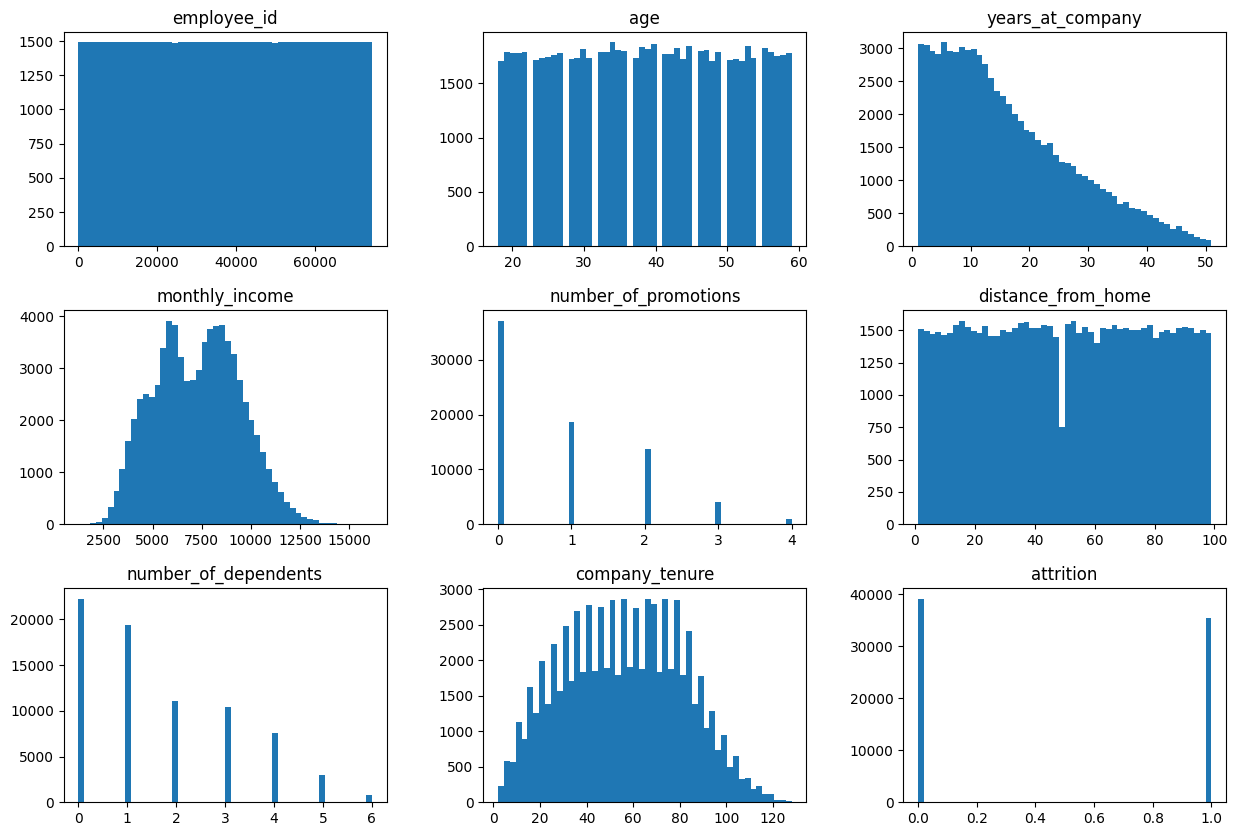

In [19]:
df[numerical_cols].hist(bins=50, figsize=(15,10), grid=False)
plt.show()

#There is no long-tail distribution, so log transformation is not necessary.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [22]:
y_full_train = df_full_train.attrition.values
y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

In [23]:
del df_full_train['employee_id']
del df_full_train['attrition']
del df_train['employee_id']
del df_train['attrition']
del df_val['employee_id']
del df_val['attrition']
del df_test['employee_id']
del df_test['attrition']

In [20]:
df_test

,age,gender,years_at_company,job_role,monthly_income,work-life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,...,marital_status,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition
54256,49,male,21,healthcare,7788,good,very_high,high,1,yes,...,divorced,0,entry,large,24,no,no,yes,good,low
18403,52,male,42,healthcare,7456,good,high,average,2,no,...,married,1,entry,small,102,no,no,no,poor,low
29862,31,female,12,finance,6009,good,low,average,0,no,...,single,0,mid,medium,34,no,no,no,fair,medium
27103,35,male,6,finance,8030,fair,high,average,2,no,...,married,3,mid,large,37,yes,no,no,fair,high
48294,40,male,30,healthcare,7708,poor,high,average,0,no,...,single,0,senior,large,72,no,no,no,fair,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32537,23,female,15,technology,8169,poor,very_high,average,1,no,...,married,1,senior,small,94,no,no,no,good,low
18090,36,male,9,technology,10182,good,low,average,2,no,...,single,0,senior,medium,82,no,no,no,fair,high
65065,31,male,15,healthcare,8660,fair,medium,high,0,no,...,married,0,mid,medium,54,no,no,no,poor,medium
53845,29,female,18,healthcare,8999,fair,high,average,0,no,...,divorced,0,entry,large,42,no,no,no,good,medium


## 2. EDA

In [24]:
df

,employee_id,age,gender,years_at_company,job_role,monthly_income,work-life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,male,19,education,5390,excellent,medium,average,2,...,0,mid,medium,89,no,no,no,excellent,medium,0
1,64756,59,female,4,media,5534,poor,high,low,3,...,3,mid,medium,21,no,no,no,fair,low,0
2,30257,24,female,10,healthcare,8159,good,high,low,0,...,3,mid,medium,74,no,no,no,poor,low,0
3,65791,36,female,7,education,3989,good,high,high,1,...,2,mid,small,50,yes,no,no,good,medium,0
4,65026,56,male,41,education,4821,fair,very_high,average,0,...,0,senior,medium,68,no,no,no,fair,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,female,42,healthcare,7830,poor,medium,average,0,...,0,senior,medium,60,no,no,no,poor,medium,0
74494,47175,30,female,15,education,3856,good,medium,average,2,...,0,entry,medium,20,no,no,no,good,medium,1
74495,12409,52,male,5,education,5654,good,very_high,below_average,0,...,4,mid,small,7,no,no,no,good,high,1
74496,9554,18,male,4,education,5276,fair,high,average,0,...,3,mid,large,5,no,no,no,poor,high,0


In [25]:
# Check the attrition rate

df.attrition.value_counts(normalize=True)

attrition
0    0.525222
1    0.474778
Name: proportion, dtype: float64

In [26]:
global_attrition_rate = df['attrition'].mean()
round(global_attrition_rate, 2)

0.47

### 2.1 Feature importance

In [27]:
df[df.gender == 'male'].attrition.mean()

0.42913829422426886

In [28]:
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)
categorical_cols

['gender',
 'job_role',
 'work-life_balance',
 'job_satisfaction',
 'performance_rating',
 'overtime',
 'education_level',
 'marital_status',
 'job_level',
 'company_size',
 'remote_work',
 'leadership_opportunities',
 'innovation_opportunities',
 'company_reputation',
 'employee_recognition']

In [29]:
from IPython.display import display

for c in categorical_cols:
    print(c)
    print('-------------------------------------------------')
    df_group = df.groupby(c).attrition.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_attrition_rate
    df_group['risk'] = df_group['mean'] / global_attrition_rate
    df_group.sort_values(by = 'risk', ascending = False, inplace = True)
    
    display(df_group)
    
    

gender
-------------------------------------------------


,mean,count,diff,risk
gender,,,,
female,0.530114,33672,0.055336,1.116552
male,0.429138,40826,-0.045640,0.903872


job_role
-------------------------------------------------


,mean,count,diff,risk
job_role,,,,
education,0.487674,15658,0.012896,1.027163
healthcare,0.475108,17074,0.000331,1.000696
technology,0.470914,19322,-0.003864,0.991862
finance,0.469276,10448,-0.005501,0.988413
media,0.468489,11996,-0.006288,0.986755


work-life_balance
-------------------------------------------------


,mean,count,diff,risk
work-life_balance,,,,
poor,0.601792,10379,0.127014,1.267524
fair,0.575569,22529,0.100791,1.212292
good,0.403722,28158,-0.071056,0.850338
excellent,0.356537,13432,-0.118241,0.750955


job_satisfaction
-------------------------------------------------


,mean,count,diff,risk
job_satisfaction,,,,
very_high,0.530274,15079,0.055496,1.116888
low,0.527826,7457,0.053048,1.111733
medium,0.453829,14717,-0.020949,0.955876
high,0.449966,37245,-0.024811,0.947741


performance_rating
-------------------------------------------------


,mean,count,diff,risk
performance_rating,,,,
low,0.570509,3730,0.095732,1.201634
below_average,0.515845,11139,0.041067,1.086498
high,0.462039,14910,-0.012739,0.973169
average,0.460811,44719,-0.013967,0.970582


overtime
-------------------------------------------------


,mean,count,diff,risk
overtime,,,,
yes,0.514934,24341,0.040156,1.084578
no,0.455290,50157,-0.019487,0.958955


education_level
-------------------------------------------------


,mean,count,diff,risk
education_level,,,,
bachelor’s_degree,0.489499,22331,0.014721,1.031006
master’s_degree,0.488117,15021,0.013339,1.028095
associate_degree,0.486729,18649,0.011951,1.025171
high_school,0.483515,14680,0.008737,1.018403
phd,0.244171,3817,-0.230607,0.514284


marital_status
-------------------------------------------------


,mean,count,diff,risk
marital_status,,,,
single,0.667820,26001,0.193043,1.406596
divorced,0.408106,11078,-0.066672,0.859573
married,0.360378,37419,-0.114399,0.759046


job_level
-------------------------------------------------


,mean,count,diff,risk
job_level,,,,
entry,0.632740,29780,0.157962,1.332708
mid,0.454175,29678,-0.020603,0.956605
senior,0.202660,15040,-0.272118,0.426851


company_size
-------------------------------------------------


,mean,count,diff,risk
company_size,,,,
small,0.496712,22355,0.021934,1.046199
large,0.465531,14912,-0.009247,0.980524
medium,0.465311,37231,-0.009467,0.980061


remote_work
-------------------------------------------------


,mean,count,diff,risk
remote_work,,,,
no,0.528375,60300,0.053597,1.112888
yes,0.247147,14198,-0.227630,0.520554


leadership_opportunities
-------------------------------------------------


,mean,count,diff,risk
leadership_opportunities,,,,
no,0.476138,70845,0.001360,1.002865
yes,0.448399,3653,-0.026379,0.944439


innovation_opportunities
-------------------------------------------------


,mean,count,diff,risk
innovation_opportunities,,,,
no,0.479517,62394,0.004739,1.009982
yes,0.450347,12104,-0.024431,0.948543


company_reputation
-------------------------------------------------


,mean,count,diff,risk
company_reputation,,,,
poor,0.560201,15116,0.085423,1.179923
fair,0.517719,14786,0.042942,1.090446
excellent,0.439574,7414,-0.035204,0.925851
good,0.429993,37182,-0.044785,0.905672


employee_recognition
-------------------------------------------------


,mean,count,diff,risk
employee_recognition,,,,
low,0.478157,29620,0.003379,1.007117
medium,0.475968,22657,0.001190,1.002506
high,0.470836,18550,-0.003942,0.991697
very_high,0.460093,3671,-0.014685,0.969069


In [30]:
from IPython.display import display
import pandas as pd

all_groups = []

for c in categorical_cols:
    df_group = df.groupby(c).attrition.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_attrition_rate
    df_group['risk'] = df_group['mean'] / global_attrition_rate
    df_group.sort_values(by='risk', ascending=False, inplace=True)
    
    df_group['category'] = c
    df_group['value'] = df_group.index  
    all_groups.append(df_group)  

combined_df = pd.concat(all_groups)

combined_df_sorted = combined_df.sort_values(by='risk', ascending=False)

display(combined_df_sorted.reset_index(drop=True).head(3))

#The top 3 risk groups to attrition are:
# marital_status=single, 
# ob_level=entry,
# work-life_balance=poor

display(combined_df_sorted.reset_index(drop=True).tail(3))

#The top 3 no risk groups to attrition are:
#remote_work=yes,
#education_level=phd,
#job_level=senior


,mean,count,diff,risk,category,value
0,0.667820,26001,0.193043,1.406596,marital_status,single
1,0.632740,29780,0.157962,1.332708,job_level,entry
2,0.601792,10379,0.127014,1.267524,work-life_balance,poor


,mean,count,diff,risk,category,value
46,0.247147,14198,-0.227630,0.520554,remote_work,yes
47,0.244171,3817,-0.230607,0.514284,education_level,phd
48,0.202660,15040,-0.272118,0.426851,job_level,senior


In [31]:
from sklearn.metrics import mutual_info_score

In [32]:
def calculate_mis(series):
    return mutual_info_score(series, df.attrition)

In [33]:
df_mis = df[categorical_cols].apply(calculate_mis)
df_mis = df_mis.sort_values(ascending=False).to_frame(name='MIS')

df_mis

#Attrition depends most on the following 3 categorical variables:
#job_level,
# marital_status,
# remote_work

,MIS
job_level,0.052832
marital_status,0.041145
remote_work,0.025563
work-life_balance,0.019680
education_level,0.006081
company_reputation,0.005963
gender,0.005070
job_satisfaction,0.002604
performance_rating,0.001725
overtime,0.001568


In [34]:
numerical_cols.remove('employee_id')
numerical_cols.remove('attrition')


In [35]:
df[numerical_cols].corrwith(df.attrition).sort_values(ascending=False)

# Among the numerical variables, only `distance_from_home`
# correlates positively with the target variable and all the others correlate negatively.
# Another interesting thing for me is that 'monthly_income' is not a significant factor for stayed.


distance_from_home      0.093836
monthly_income         -0.010687
company_tenure         -0.028964
age                    -0.050801
years_at_company       -0.065388
number_of_dependents   -0.074606
number_of_promotions   -0.081184
dtype: float64

## 3. One-hot encoding

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
full_train_dicts = df_full_train[categorical_cols + numerical_cols].to_dict(orient='records')
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
test_dicts = df_test[categorical_cols + numerical_cols].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(full_train_dicts)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)


## 4. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [39]:
dt = DecisionTreeClassifier(random_state=1)

In [40]:
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]

y_pred_round = np.round(y_pred)

auc = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred_round)
recall = recall_score(y_val, y_pred_round)
f1 = f1_score(y_val, y_pred_round)

print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print('---------------')


cm = confusion_matrix(y_val, y_pred_round)
print("Confusion Matrix:")
print(cm)
print('---------------')


report = classification_report(y_val, y_pred_round, digits=4)
print("Classification Report:")
print(report)



AUC: 0.6693954461765181
Precision: 0.6570265337638636
Recall: 0.6541794800111825
F1 Score: 0.6555999159487287
---------------
Confusion Matrix:
[[5303 2443]
 [2474 4680]]
---------------
Classification Report:
              precision    recall  f1-score   support

           0     0.6819    0.6846    0.6832      7746
           1     0.6570    0.6542    0.6556      7154

    accuracy                         0.6700     14900
   macro avg     0.6695    0.6694    0.6694     14900
weighted avg     0.6699    0.6700    0.6700     14900



In [41]:
scores = []

for d in [2,5,10, 15, 20, 50]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d,
                                    min_samples_leaf=s,
                                    random_state=1)
        
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))
    
scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
scores.sort_values(by='auc', ascending=False, inplace=True)

scores.head()
    

,max_depth,min_samples_leaf,auc
24,10,100,0.819889
51,50,100,0.819578
42,20,100,0.819578
33,15,100,0.819578
25,10,200,0.816805


In [42]:
scores_pivot = scores.pivot(index=['min_samples_leaf'], columns=['max_depth'], values=['auc']).round(3)
scores_pivot

auc                                   
max_depth            2      5      10     15     20     50
min_samples_leaf                                          
1                 0.719  0.792  0.800  0.727  0.680  0.669
2                 0.719  0.792  0.805  0.742  0.702  0.690
5                 0.719  0.792  0.806  0.765  0.743  0.736
10                0.719  0.792  0.813  0.788  0.774  0.771
15                0.719  0.792  0.812  0.794  0.786  0.785
20                0.719  0.792  0.814  0.803  0.796  0.795
100               0.719  0.792  0.820  0.820  0.820  0.820
200               0.719  0.793  0.817  0.816  0.816  0.816
500               0.719  0.790  0.809  0.809  0.809  0.809

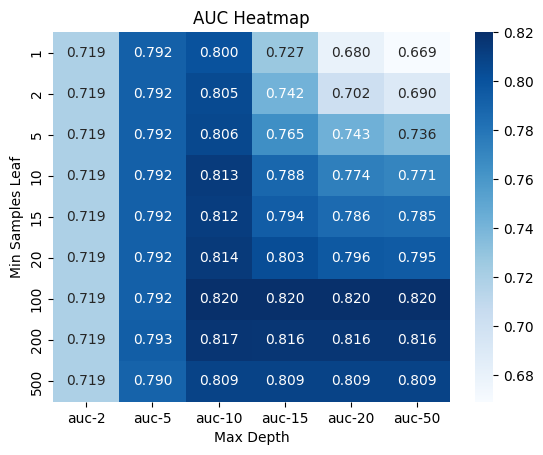

In [43]:
sns.heatmap(scores_pivot, annot=True, fmt='.3f', cmap='Blues', annot_kws={"size": 10})

plt.xlabel("Max Depth")  
plt.ylabel("Min Samples Leaf")  
plt.title("AUC Heatmap")

plt.show()


In [44]:
dt = DecisionTreeClassifier(random_state=1,
                            max_depth=25,
                            min_samples_leaf=2,
                            min_samples_split=200)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]
y_pred_round = np.round(y_pred)

auc = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred_round)
recall = recall_score(y_val, y_pred_round)
f1 = f1_score(y_val, y_pred_round)

print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print('---------------')


cm = confusion_matrix(y_val, y_pred_round)
print("Confusion Matrix:")
print(cm)
print('---------------')


report = classification_report(y_val, y_pred_round, digits=4)
print("Classification Report:")
print(report)


AUC: 0.8190978889353986
Precision: 0.7280940771547397
Recall: 0.7096729102599945
F1 Score: 0.7187654845331635
---------------
Confusion Matrix:
[[5850 1896]
 [2077 5077]]
---------------
Classification Report:
              precision    recall  f1-score   support

           0     0.7380    0.7552    0.7465      7746
           1     0.7281    0.7097    0.7188      7154

    accuracy                         0.7334     14900
   macro avg     0.7330    0.7325    0.7326     14900
weighted avg     0.7332    0.7334    0.7332     14900



In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, 25, 50],
    'min_samples_split': [2, 5, 10, 50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.1],
}



# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=100,  # Number of random combinations to try
    scoring='roc_auc',  # Replace with your metric (e.g., 'accuracy', 'roc_auc')
    cv=5,  # Number of cross-validation folds
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all processors for parallel computation
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Using RandomizedSearchCV, with these parameters, I couldn't find a more accurate model.

Best Parameters: {'min_samples_split': 200, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Best Score: 0.8135667330020298


In [45]:
dt = DecisionTreeClassifier(
    min_samples_split=200,
    min_samples_leaf=100,
    max_features=None,
    max_depth=10,
    criterion='entropy',
    ccp_alpha=0.0
)

dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]
y_pred_round = np.round(y_pred)


auc = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred_round)
recall = recall_score(y_val, y_pred_round)
f1 = f1_score(y_val, y_pred_round)

print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print('---------------')


cm = confusion_matrix(y_val, y_pred_round)
print("Confusion Matrix:")
print(cm)
print('---------------')


report = classification_report(y_val, y_pred_round, digits=4)
print("Classification Report:")
print(report)




AUC: 0.8199764074215152
Precision: 0.7227488151658767
Recall: 0.724769359798714
F1 Score: 0.7237576772752652
---------------
Confusion Matrix:
[[5757 1989]
 [1969 5185]]
---------------
Classification Report:
              precision    recall  f1-score   support

           0     0.7451    0.7432    0.7442      7746
           1     0.7227    0.7248    0.7238      7154

    accuracy                         0.7344     14900
   macro avg     0.7339    0.7340    0.7340     14900
weighted avg     0.7344    0.7344    0.7344     14900



#### In the decision tree model, i tried to find the best parameters, with RandomizedSearchCV, the final AUC of this model is 0.8199

## 5. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(random_state=1,
                            n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
y_pred_round = np.round(y_pred)


auc = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred_round)
recall = recall_score(y_val, y_pred_round)
f1 = f1_score(y_val, y_pred_round)

print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print('---------------')


cm = confusion_matrix(y_val, y_pred_round)
print("Confusion Matrix:")
print(cm)
print('---------------')


report = classification_report(y_val, y_pred_round, digits=4)
print("Classification Report:")
print(report)

AUC: 0.8359461331724525
Precision: 0.7457406872653768
Recall: 0.7219737209952474
F1 Score: 0.7336647727272727
---------------
Confusion Matrix:
[[5985 1761]
 [1989 5165]]
---------------
Classification Report:
              precision    recall  f1-score   support

           0     0.7506    0.7727    0.7615      7746
           1     0.7457    0.7220    0.7337      7154

    accuracy                         0.7483     14900
   macro avg     0.7482    0.7473    0.7476     14900
weighted avg     0.7482    0.7483    0.7481     14900



In [48]:
scores = []
for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((i, auc))
    

scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
scores.sort_values(by='auc', ascending=False, inplace=True)

scores.head()

,n_estimators,auc
19,200,0.838288
18,190,0.838168
17,180,0.837992
16,170,0.837518
15,160,0.837314


In [49]:
scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
scores

,n_estimators,auc
19,200,0.838288
18,190,0.838168
17,180,0.837992
16,170,0.837518
15,160,0.837314
14,150,0.837258
13,140,0.837158
12,130,0.836698
11,120,0.836346
10,110,0.836152


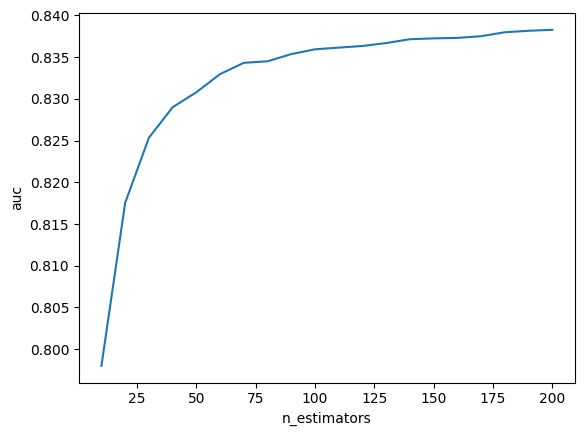

In [50]:
sns.lineplot(x='n_estimators', y='auc', data=scores)

n_estimators = 90

#For n_estimators = 90 is enough because after that, the AUC value only increases very slightly.

In [51]:
scores = []
for d in range(10, 26, 1):
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=d,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((d, auc))
    

scores = pd.DataFrame(scores, columns=['max_depth', 'auc'])
scores.sort_values(by='auc', ascending=False, inplace=True)

scores.head()

,max_depth,auc
4,14,0.840897
3,13,0.840800
6,16,0.839851
2,12,0.839642
1,11,0.839439


<Axes: xlabel='max_depth', ylabel='auc'>

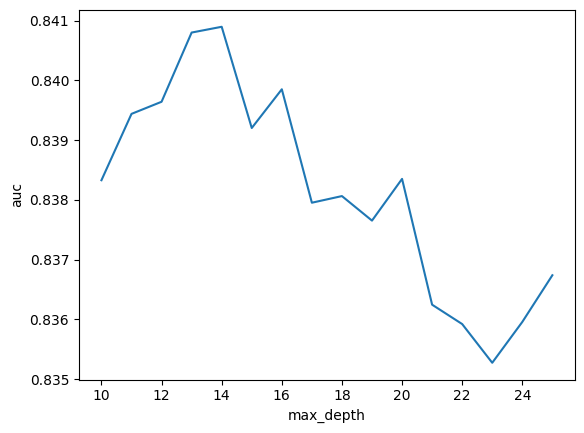

In [52]:
sns.lineplot(x='max_depth', y='auc', data=scores)

#For max_depth = 14 the AUC can reach 0.84

In [53]:
max_depth = 14

In [52]:
'''
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [3, 5, 10, 15, 20, 25, 50, None],
    'min_samples_split': [2, 5, 10, 50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.1],
    'bootstrap': [True, False],
}

# Create the Random Forest Classifier
clf = RandomForestClassifier(random_state=1)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=20,  # Increased number of random combinations to try
    scoring='roc_auc',  # Replace with your metric
    cv=5,  # Number of cross-validation folds
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all processors for parallel computation
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# RandomizedSearchCV cann't find better parameters to increase the AUC score.
'''

'\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [10, 50, 100, 200, 500],\n    \'max_depth\': [3, 5, 10, 15, 20, 25, 50, None],\n    \'min_samples_split\': [2, 5, 10, 50, 100, 200],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'ccp_alpha\': [0.0, 0.01, 0.1],\n    \'bootstrap\': [True, False],\n}\n\n# Create the Random Forest Classifier\nclf = RandomForestClassifier(random_state=1)\n\n# Define RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    estimator=clf,\n    param_distributions=param_grid,\n    n_iter=20,  # Increased number of random combinations to try\n    scoring=\'roc_auc\',  # Replace with your metric\n    cv=5,  # Number of cross-validation folds\n    random_state=42,  # For reproducibility\n    n_jobs=-1  # Use all processors for parallel computation\n)\n\n# Fit the RandomizedSearchCV\nrandom_search.fit(X_train, y_train)\n\n# Print the best parameter

In [54]:
# This is the final RandomForestClassifier model:

rf = RandomForestClassifier(random_state=1,
                            n_estimators=90,
                            max_depth=14)

rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
y_pred_round = np.round(y_pred)


auc = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred_round)
recall = recall_score(y_val, y_pred_round)
f1 = f1_score(y_val, y_pred_round)

print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print('---------------')


cm = confusion_matrix(y_val, y_pred_round)
print("Confusion Matrix:")
print(cm)
print('---------------')


report = classification_report(y_val, y_pred_round, digits=4)
print("Classification Report:")
print(report)



AUC: 0.8408969510790638
Precision: 0.7447050461975835
Recall: 0.7323175845680738
F1 Score: 0.7384593699344563
---------------
Confusion Matrix:
[[5950 1796]
 [1915 5239]]
---------------
Classification Report:
              precision    recall  f1-score   support

           0     0.7565    0.7681    0.7623      7746
           1     0.7447    0.7323    0.7385      7154

    accuracy                         0.7509     14900
   macro avg     0.7506    0.7502    0.7504     14900
weighted avg     0.7508    0.7509    0.7508     14900



#### With little parameter tuning (max_depth = 14, n_estimators = 90) the random forest model reached an AUC of 0.8409

## 6. XGBoost

In [55]:
import xgboost as xgb

In [56]:
features = list(dv.get_feature_names_out())

In [57]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [58]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 2
}


model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [59]:
y_pred = model.predict(dval)

In [60]:
roc_auc_score(y_val, y_pred)

0.8437436591945225

In [61]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [62]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 2
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals = watchlist)

In [63]:
# Print the captured output
print(output.stdout)

[0]	train-auc:0.80615	val-auc:0.80536
[5]	train-auc:0.84077	val-auc:0.83625
[10]	train-auc:0.85593	val-auc:0.84503
[15]	train-auc:0.86329	val-auc:0.84823
[20]	train-auc:0.86982	val-auc:0.84943
[25]	train-auc:0.87363	val-auc:0.84968
[30]	train-auc:0.87840	val-auc:0.84970
[35]	train-auc:0.88269	val-auc:0.84961
[40]	train-auc:0.88685	val-auc:0.84950
[45]	train-auc:0.89057	val-auc:0.84900
[50]	train-auc:0.89417	val-auc:0.84843
[55]	train-auc:0.89778	val-auc:0.84826
[60]	train-auc:0.90144	val-auc:0.84757
[65]	train-auc:0.90500	val-auc:0.84662
[70]	train-auc:0.90776	val-auc:0.84621
[75]	train-auc:0.91068	val-auc:0.84522
[80]	train-auc:0.91421	val-auc:0.84444
[85]	train-auc:0.91705	val-auc:0.84418
[90]	train-auc:0.91994	val-auc:0.84355
[95]	train-auc:0.92226	val-auc:0.84297
[100]	train-auc:0.92540	val-auc:0.84228
[105]	train-auc:0.92833	val-auc:0.84172
[110]	train-auc:0.93076	val-auc:0.84111
[115]	train-auc:0.93331	val-auc:0.84072
[120]	train-auc:0.93593	val-auc:0.84050
[125]	train-auc:0.9382

In [63]:
'''

s = output.stdout
line = s.split('\n')[0]
num_iter, train_auc, val_auc = line.split('\t')

int(num_iter.strip('[]'))
float(train_auc.split(':')[1])
float(val_auc.split(':')[1])

'''

"\n\ns = output.stdout\nline = s.split('\n')[0]\nnum_iter, train_auc, val_auc = line.split('\t')\n\nint(num_iter.strip('[]'))\nfloat(train_auc.split(':')[1])\nfloat(val_auc.split(':')[1])\n\n"

In [64]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [65]:
df_score = parse_xgb_output(output)

In [66]:
df_score.head(15)

,num_iter,train_auc,val_auc
0,0,0.80615,0.80536
1,5,0.84077,0.83625
2,10,0.85593,0.84503
3,15,0.86329,0.84823
4,20,0.86982,0.84943
5,25,0.87363,0.84968
6,30,0.87840,0.84970
7,35,0.88269,0.84961
8,40,0.88685,0.84950
9,45,0.89057,0.84900


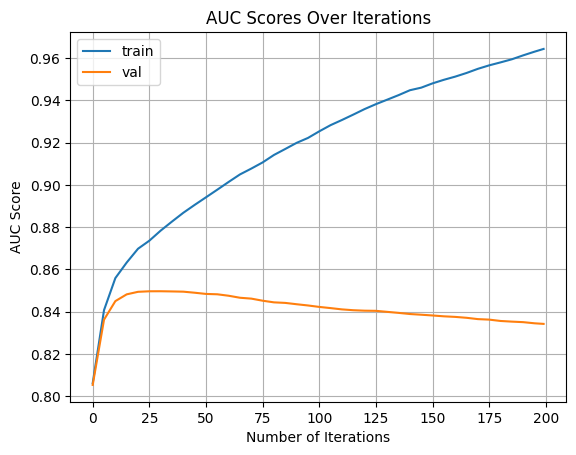

In [67]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()


plt.xlabel('Number of Iterations')  
plt.ylabel('AUC Score')            
plt.title('AUC Scores Over Iterations')
plt.grid()  # Optional: Add a grid for better readability
plt.show()


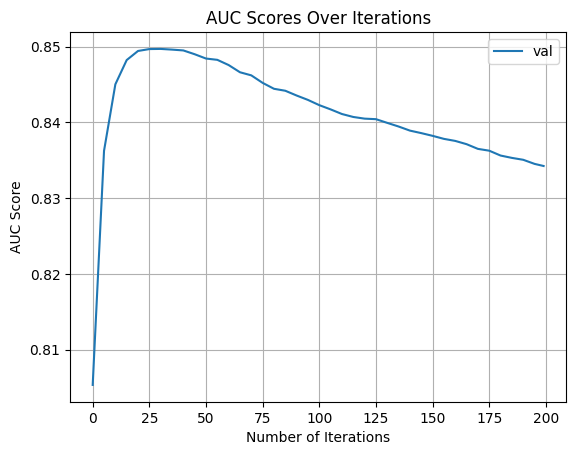

In [68]:
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')

plt.legend()


plt.xlabel('Number of Iterations')  
plt.ylabel('AUC Score')            
plt.title('AUC Scores Over Iterations')
plt.grid()  # Optional: Add a grid for better readability
plt.show()

#### As you can see XGB model reach the best AUC on the validation dataset around 30 iterations (AUC = 0.8497).

In [71]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 2
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30)

In [98]:
y_pred = model.predict(dval, output_margin=False)
roc_auc_score(y_val, y_pred)

0.8496943438517348

In [90]:
y_pred = np.where(y_pred > 0.5, 1, 0) 

# Kiszámítjuk a confusion matrix-ot
cm = confusion_matrix(y_val, y_pred)

# Kiíratjuk
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5943 1803]
 [1804 5350]]
